In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preparation

In [2]:
train_data_dir = "../input/flowerdatasets/flowers/train"
val_data_dir = "../input/flowerdatasets/flowers/val"
test_data_dir = "../input/flowerdatasets/flowers/test"

class_subset = sorted(f for f in os.listdir(train_data_dir) if not f.startswith('.'))
print(class_subset)

['daisy', 'dandelion', 'lily', 'orchid', 'rose', 'sunflower', 'tulip']


In [3]:
#central crop
def crop_center_square(image):
    img_height, img_width = image.shape[0:2]
    min_dim = min(img_height, img_width)
    start_x = (img_width // 2) - (min_dim // 2)
    start_y = (img_height // 2) - (min_dim // 2)
    
    img = image[start_y : start_y + min_dim, start_x : start_x + min_dim]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# Definte Image Data Generator

In [4]:
train_generator = ImageDataGenerator(rescale=1/255.,
                                     featurewise_center= False,
                                     samplewise_center= False,
                                     featurewise_std_normalization= False,
                                     samplewise_std_normalization=False,
                                     rotation_range= 10,     # 0-180
                                     zca_whitening=False,
                                     zoom_range=0.1,         # Randomly zoom image
                                     width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                     height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
                                     horizontal_flip=True,   # randomly flip images
                                     vertical_flip=False,
                                     validation_split=0.0,
                                     preprocessing_function=crop_center_square)

val_generator  = ImageDataGenerator(rescale=1/255.,
                                    preprocessing_function=crop_center_square)

test_generator = ImageDataGenerator(rescale=1/255.,
                                    preprocessing_function=crop_center_square)

# Define Models

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

BATCH_SIZE = 32
image_size = 224
channel = 3
lr = 1e-4

## VGG16

In [6]:
# VGG16
vgg16_base_model = VGG16(weights='imagenet',
                         include_top= False, 
                         input_shape=(image_size, image_size, channel),
                         pooling='avg')

vgg16_base_model.trainable = False

vgg16_model = Sequential()
vgg16_model.add(vgg16_base_model)
vgg16_model.add(layers.Dense(256,activation='relu'))
vgg16_model.add(layers.Dropout(0.2))
vgg16_model.add(layers.Dense(len(class_subset),activation="softmax"))

vgg16_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

2022-05-10 15:54:31.395633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 15:54:31.530203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 15:54:31.531396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 15:54:31.533262: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

58900480/58889256 [==============================] - 1s 0us/step


## DenseNet121

In [7]:
# DenseNet121
densenet_base_model = DenseNet121(weights='imagenet',
                                  include_top= False, 
                                  input_shape=(image_size, image_size, channel),
                                  pooling='avg')

densenet_base_model.trainable = False

densenet_model = Sequential()
densenet_model.add(densenet_base_model)
densenet_model.add(layers.Dense(256,activation='relu'))
densenet_model.add(layers.Dropout(0.2))
densenet_model.add(layers.Dense(len(class_subset),activation="softmax"))

densenet_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

29097984/29084464 [==============================] - 0s 0us/step


## MobileNetV2 

In [8]:
# MobileNetV2
mobilenet_base_model = MobileNetV2(weights='imagenet',
                                   include_top= False, 
                                   input_shape=(image_size, image_size, channel),
                                   pooling='avg')

mobilenet_base_model.trainable = False

mobilenet_model = Sequential()
mobilenet_model.add(mobilenet_base_model)
mobilenet_model.add(layers.Dense(256,activation='relu'))
mobilenet_model.add(layers.Dropout(0.2))
mobilenet_model.add(layers.Dense(len(class_subset),activation="softmax"))

mobilenet_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


## ResNet101v2

In [9]:
# ResNet101v2
resnet101_base_model = ResNet101V2(weights='imagenet',
                                   include_top= False, 
                                   input_shape=(image_size, image_size, channel),
                                   pooling='avg')

resnet101_base_model.trainable = False

resnet101_model = Sequential()
resnet101_model.add(resnet101_base_model)
resnet101_model.add(layers.Dense(256,activation='relu'))
resnet101_model.add(layers.Dropout(0.2))
resnet101_model.add(layers.Dense(len(class_subset),activation="softmax"))

resnet101_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

171327488/171317808 [==============================] - 2s 0us/step


# InceptionV3

In [10]:
# InceptionV3
inception_base_model = InceptionV3(input_shape = (image_size, image_size, channel), 
                                   include_top = False, 
                                   weights = 'imagenet',
                                   pooling='avg')

inception_base_model.trainable = False

inception_model = Sequential()
inception_model.add(inception_base_model)
inception_model.add(layers.Dense(256,activation='relu'))
inception_model.add(layers.Dropout(0.2))
inception_model.add(layers.Dense(len(class_subset),activation="softmax"))

inception_model.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

87924736/87910968 [==============================] - 1s 0us/step


# InceptionResNet

In [11]:
# InceptionResNetV2
inceptionresnet_base_model = InceptionResNetV2(input_shape = (image_size, image_size, channel), 
                                               include_top = False, 
                                               weights="imagenet", 
                                               pooling='avg')

inceptionresnet_base_model.trainable = False

inceptionresnet = Sequential()
inceptionresnet.add(inceptionresnet_base_model)
inceptionresnet.add(layers.Dense(256,activation='relu'))
inceptionresnet.add(layers.Dropout(0.2))
inceptionresnet.add(layers.Dense(len(class_subset),activation="softmax"))

inceptionresnet.compile(optimizer=optimizers.Adam(learning_rate = lr), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

219070464/219055592 [==============================] - 6s 0us/step


## Define data generators

In [12]:
traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(image_size, image_size),
                                               class_mode='categorical',
                                               classes=class_subset,
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=21)

validgen = val_generator.flow_from_directory(val_data_dir,
                                             target_size=(image_size, image_size),
                                             classes=class_subset,
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             seed=21)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(image_size, image_size),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=21)

Found 8069 images belonging to 7 classes.
Found 2306 images belonging to 7 classes.
Found 1156 images belonging to 7 classes.


In [13]:
model_dict = {
    "vgg16": vgg16_model,
    "inceptionv3": inception_model,
    "inception_resnet": inceptionresnet,
    "densenet121": densenet_model,
    "mobilenetv2": mobilenet_model,
    "resnet101": resnet101_model
}

weightfile_dict = {
    "vgg16" : 'vgg16_model.hdf5',
    "inceptionv3" : 'inceptionv3_model.hdf5',
    "inception_resnet" : 'inception_resnet_model.hdf5',
    "densenet121" : 'densenet121_model.hdf5',
    "mobilenetv2" : 'mobilenetv2_model.hdf5',
    "resnet101"   : 'resnet101_model.hdf5'    
}

historyfile_dict = {
    "vgg16" : 'vgg16_history.csv',
    "inceptionv3" : 'inceptionv3_history.csv',
    "inception_resnet" : 'inception_resnet_history.csv',
    "densenet121" : 'densenet121_history.csv',
    "mobilenetv2" : 'mobilenetv2_history.csv',
    "resnet101"   : 'resnet101_history.csv'    
}

In [14]:
class_indices = traingen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

# Modeling Training & Evaluation

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

In [16]:
def show_confusion_matrix(ground_truths, predictions, model_name, class_indices):

    cm  = confusion_matrix(ground_truths, predictions)

    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
    plt.xticks(range(len(class_indices)), class_indices.values(), fontsize=16)
    plt.yticks(range(len(class_indices)), class_indices.values(), fontsize=16)
    plt.xlabel('Predicted Label',fontsize=18)
    plt.ylabel('True Label',fontsize=18)
    plt.title("Confusion Matrix for " + model_name, fontsize=18)
    plt.savefig(model_name + "_confusion_matrix.png")
    plt.show()    

### Training VGG16 ###


2022-05-10 15:55:20.462384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-05-10 15:55:23.186670: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


252/252 [==============================] - 233s 881ms/step - loss: 1.6009 - accuracy: 0.4808 - val_loss: 1.1490 - val_accuracy: 0.7878

Epoch 00001: val_accuracy improved from -inf to 0.78776, saving model to vgg16_model.hdf5
Epoch 2/10
252/252 [==============================] - 171s 677ms/step - loss: 1.0137 - accuracy: 0.7755 - val_loss: 0.7358 - val_accuracy: 0.8633

Epoch 00002: val_accuracy improved from 0.78776 to 0.86328, saving model to vgg16_model.hdf5
Epoch 3/10
252/252 [==============================] - 168s 667ms/step - loss: 0.7187 - accuracy: 0.8468 - val_loss: 0.5374 - val_accuracy: 0.8906

Epoch 00003: val_accuracy improved from 0.86328 to 0.89062, saving model to vgg16_model.hdf5
Epoch 4/10
252/252 [==============================] - 169s 667ms/step - loss: 0.5597 - accuracy: 0.8787 - val_loss: 0.4280 - val_accuracy: 0.9123

Epoch 00004: val_accuracy improved from 0.89062 to 0.91233, saving model to vgg16_model.hdf5
Epoch 5/10
252/252 [==============================] - 

<Figure size 432x288 with 0 Axes>

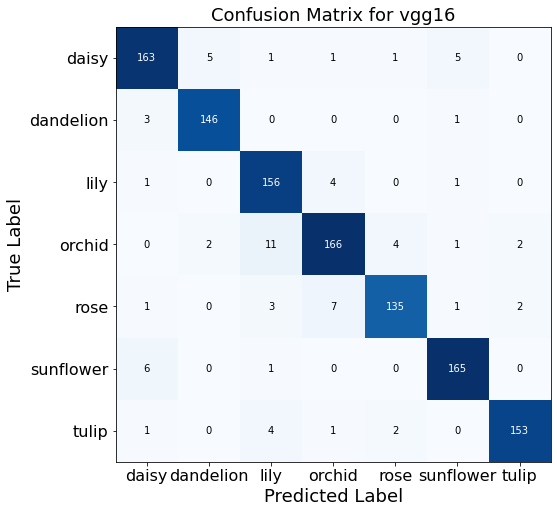

VGG16 model Accuracy: 93.77%


### Training INCEPTIONV3 ###
Epoch 1/10
252/252 [==============================] - 177s 681ms/step - loss: 0.5286 - accuracy: 0.8289 - val_loss: 0.1874 - val_accuracy: 0.9418

Epoch 00001: val_accuracy improved from -inf to 0.94184, saving model to inceptionv3_model.hdf5
Epoch 2/10
252/252 [==============================] - 174s 691ms/step - loss: 0.2346 - accuracy: 0.9227 - val_loss: 0.1330 - val_accuracy: 0.9588

Epoch 00002: val_accuracy improved from 0.94184 to 0.95877, saving model to inceptionv3_model.hdf5
Epoch 3/10
252/252 [==============================] - 173s 688ms/step - loss: 0.1732 - accuracy: 0.9444 - val_loss: 0.1057 - val_accuracy: 0.9657

Epoch 00003: val_accuracy improved from 0.95877 to 0.96571, saving model to inceptionv3_model.hdf5
Epoch 4/10
252/252 [==============================] - 171s 678ms/step - loss: 0.1469 - accuracy: 0.9502 - val_loss: 0.0911 - val_accuracy: 0.9705

Epoch 00004: val_accuracy improved from 0.96571 to 0.97049

<Figure size 432x288 with 0 Axes>

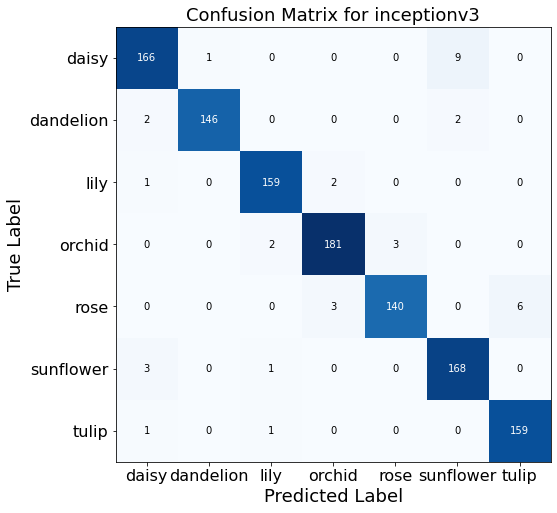

INCEPTIONV3 model Accuracy: 96.80%


### Training INCEPTION_RESNET ###
Epoch 1/10
252/252 [==============================] - 205s 765ms/step - loss: 0.5836 - accuracy: 0.8023 - val_loss: 0.2531 - val_accuracy: 0.9210

Epoch 00001: val_accuracy improved from -inf to 0.92101, saving model to inception_resnet_model.hdf5
Epoch 2/10
252/252 [==============================] - 188s 745ms/step - loss: 0.2504 - accuracy: 0.9201 - val_loss: 0.1748 - val_accuracy: 0.9462

Epoch 00002: val_accuracy improved from 0.92101 to 0.94618, saving model to inception_resnet_model.hdf5
Epoch 3/10
252/252 [==============================] - 189s 750ms/step - loss: 0.1875 - accuracy: 0.9409 - val_loss: 0.1416 - val_accuracy: 0.9544

Epoch 00003: val_accuracy improved from 0.94618 to 0.95443, saving model to inception_resnet_model.hdf5
Epoch 4/10
252/252 [==============================] - 189s 750ms/step - loss: 0.1528 - accuracy: 0.9525 - val_loss: 0.1214 - val_accuracy: 0.9570

Epoch 00004: val_accuracy improv

<Figure size 432x288 with 0 Axes>

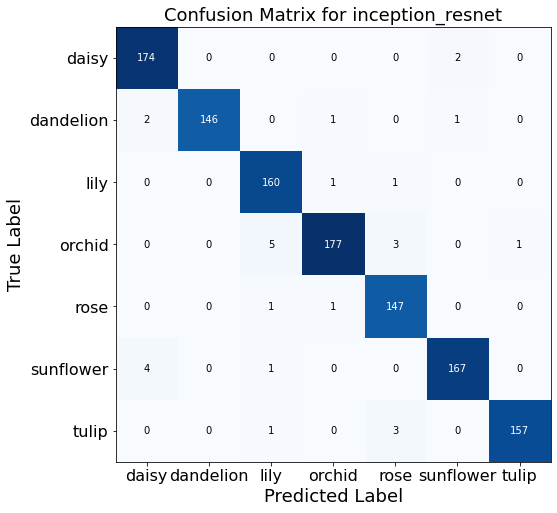

INCEPTION_RESNET model Accuracy: 97.58%


### Training DENSENET121 ###
Epoch 1/10
252/252 [==============================] - 191s 720ms/step - loss: 0.7909 - accuracy: 0.7558 - val_loss: 0.2028 - val_accuracy: 0.9653

Epoch 00001: val_accuracy improved from -inf to 0.96528, saving model to densenet121_model.hdf5
Epoch 2/10
252/252 [==============================] - 182s 723ms/step - loss: 0.2420 - accuracy: 0.9387 - val_loss: 0.1104 - val_accuracy: 0.9722

Epoch 00002: val_accuracy improved from 0.96528 to 0.97222, saving model to densenet121_model.hdf5
Epoch 3/10
252/252 [==============================] - 181s 719ms/step - loss: 0.1648 - accuracy: 0.9568 - val_loss: 0.0788 - val_accuracy: 0.9792

Epoch 00003: val_accuracy improved from 0.97222 to 0.97917, saving model to densenet121_model.hdf5
Epoch 4/10
252/252 [==============================] - 182s 724ms/step - loss: 0.1223 - accuracy: 0.9672 - val_loss: 0.0636 - val_accuracy: 0.9809

Epoch 00004: val_accuracy improved from 0.97917

<Figure size 432x288 with 0 Axes>

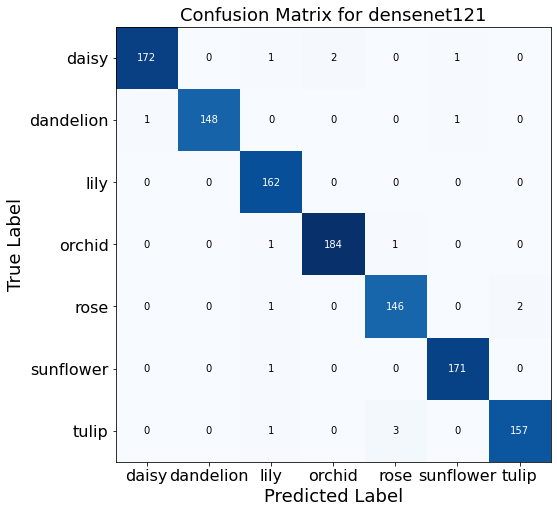

DENSENET121 model Accuracy: 98.62%


### Training MOBILENETV2 ###
Epoch 1/10
252/252 [==============================] - 179s 683ms/step - loss: 0.6040 - accuracy: 0.8122 - val_loss: 0.1757 - val_accuracy: 0.9579

Epoch 00001: val_accuracy improved from -inf to 0.95790, saving model to mobilenetv2_model.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
252/252 [==============================] - 173s 685ms/step - loss: 0.1943 - accuracy: 0.9424 - val_loss: 0.1137 - val_accuracy: 0.9727

Epoch 00002: val_accuracy improved from 0.95790 to 0.97266, saving model to mobilenetv2_model.hdf5
Epoch 3/10
252/252 [==============================] - 176s 699ms/step - loss: 0.1373 - accuracy: 0.9578 - val_loss: 0.0869 - val_accuracy: 0.9779

Epoch 00003: val_accuracy improved from 0.97266 to 0.97786, saving model to mobilenetv2_model.hdf5
Epoch 4/10
252/252 [==============================] - 171s 677ms/step - loss: 0.1142 - accuracy: 0.9662 - val_loss: 0.0755 - val_accuracy: 0.9779

Epoch 00004: val_accuracy did not improve from 0.97786
Epoch 5/10
252/252 [==============================] - 177s 702ms/step - loss: 0.0920 - accuracy: 0.9705 - val_loss: 0.0750 - val_accuracy: 0.9774

Epoch 00005: val_accuracy did not improve from 0.97786
Epoch 6/10
252/252 [==============================] - 176s 697ms/step - loss: 0.0880 - accuracy: 0.9710 

<Figure size 432x288 with 0 Axes>

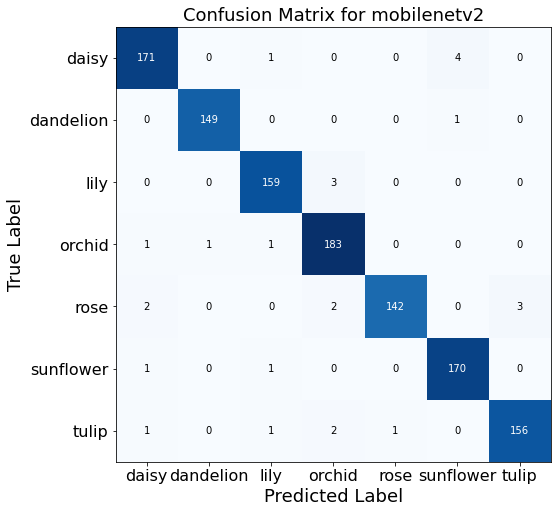

MOBILENETV2 model Accuracy: 97.75%


### Training RESNET101 ###
Epoch 1/10
252/252 [==============================] - 195s 728ms/step - loss: 0.4521 - accuracy: 0.8545 - val_loss: 0.1334 - val_accuracy: 0.9614

Epoch 00001: val_accuracy improved from -inf to 0.96137, saving model to resnet101_model.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
252/252 [==============================] - 186s 740ms/step - loss: 0.1606 - accuracy: 0.9509 - val_loss: 0.0888 - val_accuracy: 0.9718

Epoch 00002: val_accuracy improved from 0.96137 to 0.97179, saving model to resnet101_model.hdf5
Epoch 3/10
252/252 [==============================] - 184s 728ms/step - loss: 0.1120 - accuracy: 0.9649 - val_loss: 0.0691 - val_accuracy: 0.9796

Epoch 00003: val_accuracy improved from 0.97179 to 0.97960, saving model to resnet101_model.hdf5
Epoch 4/10
252/252 [==============================] - 183s 726ms/step - loss: 0.0887 - accuracy: 0.9734 - val_loss: 0.0574 - val_accuracy: 0.9818

Epoch 00004: val_accuracy improved from 0.97960 to 0.98177, saving model to resnet101_model.hdf5
Epoch 5/10
252/252 [==============================] - 188s 747ms/step - loss: 0.0786 - accuracy: 0.9749 - val_loss: 0.0493 - val_accuracy: 0.9848

Epoch 00005: val_accuracy improved from 0.98177 to 0.98481, saving model to resnet101_model.hdf5
Epoch 6/10
252/252 [====

<Figure size 432x288 with 0 Axes>

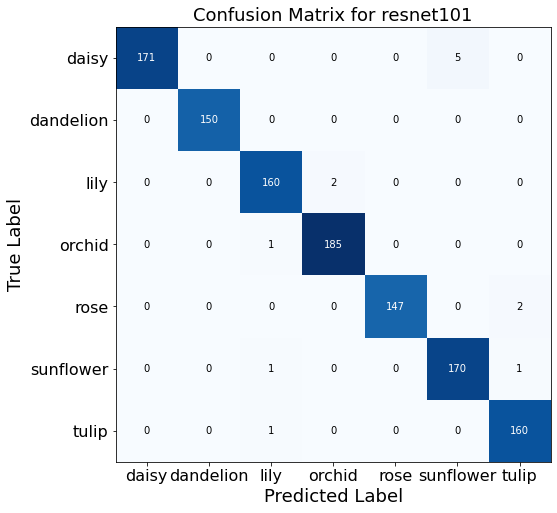

RESNET101 model Accuracy: 98.88%




In [17]:
n_epochs = 10

# Callback Function: EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max')

# Callback Function: Reduce learning rate on plateau
red_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

for key in model_dict:
    print ("### Training {} ###".format(key.upper()))

    model = model_dict[key]

    best_checkpoint = ModelCheckpoint(weightfile_dict[key],
                                      save_weights_only=False, 
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)

    history_logger = CSVLogger(historyfile_dict[key], separator=",", append=True)

    history = model.fit(traingen,
                        batch_size=BATCH_SIZE,
                        epochs=n_epochs,
                        validation_data=validgen,
                        steps_per_epoch=traingen.samples // BATCH_SIZE,
                        validation_steps=validgen.samples // BATCH_SIZE,
                        callbacks=[best_checkpoint, history_logger, early_stop], #red_lr
                        verbose=1)

    ## Model evaluation
    preds = model.predict(testgen)
    preds = np.argmax(preds, axis=1)

    report = classification_report(testgen.classes, preds, target_names=class_indices.values())
    print(report)
    
    with open("classification_reports.txt", "a") as f:
        print("{} CLASSIFICATION REPORT\n".format(key.upper()), file=f)
        print(report, file=f)

    show_confusion_matrix(testgen.classes, preds, key, class_indices)
    
    acc = accuracy_score(testgen.classes, preds)
    with open("model_accuracy.txt", "a") as f:
        print("{} model Accuracy: {:.2f}%".format(key.upper(), acc * 100))
        print("{} model Accuracy: {:.2f}%".format(key.upper(), acc * 100), file=f)

    print("\n")

# Plot Graphs

In [18]:
# history = pd.read_csv("vgg16_history.csv")

# plt.plot(history.epoch, history.history['accuracy'])
# plt.plot(history.epoch, history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.legend(['train', 'validation'])
# plt.xlabel('No. of Epochs')
# plt.ylabel('Accuracy')
# plt.figure()

# plt.plot(history.epoch, history.history['loss'])
# plt.plot(history.epoch, history.history['val_loss'])
# plt.title('Model Loss')
# plt.legend(['train', 'validation'])
# plt.xlabel('No. of Epochs')
# plt.ylabel('Loss')
# plt.show()